# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame


# Display the data table for preview


In [2]:
# Disply the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
#  Disply Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single DataFrame
combine_df =pd.merge(mouse_metadata,study_results, on ='Mouse ID')
combine_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
combine_df['Mouse ID'].nunique()

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_df =combine_df[combine_df.duplicated(['Mouse ID','Timepoint'])]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
drop_duplicate_df = combine_df.loc[combine_df['Mouse ID'] != 'g989']
drop_duplicate_df                                              

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = combine_df.loc[combine_df["Mouse ID"].isin(drop_duplicate_df)== False]  
clean_mouse_df 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_mice_df = len(clean_mouse_df['Mouse ID'].unique())
clean_mice_df 

249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimeng
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df ['Drug Regimen']).mean()
median = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df ['Drug Regimen']).median()
variance = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df ['Drug Regimen']).var()
std_deviation = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df ['Drug Regimen']).std()
sem = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df ['Drug Regimen']).sem()


In [11]:
summary_sta = pd.DataFrame({
    'Tumor Mean': mean,
    'Tumor Medin': median,
    'Tumor vaeiance': variance,
    'Tumor Std_drviation': std_deviation ,
    'Tumor Sem': sem
})

summary_sta

,Tumor Mean,Tumor Medin,Tumor vaeiance,Tumor Std_drviation,Tumor Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agenerate_summary = {'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']}
clean_mouse_df.groupby('Drug Regimen').agg(agenerate_summary)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [13]:
# mice_id = clean_mouse_df['Timepoint'].value_counts()
# mice_id

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice = clean_mouse_df['Drug Regimen'].value_counts()
mice

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

In [15]:
count_mice = (combine_df.groupby(['Timepoint']).count()) ["Mouse ID"]
count_mice

Timepoint
0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Mouse ID, dtype: int64

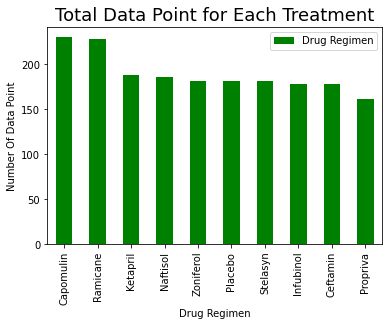

In [90]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

panda_polt =mice.plot.bar(color = '#008000')
plt.title("Total Data Point for Each Treatment", fontsize = 18)
plt.xlabel('Drug Regimen')
plt.ylabel('Number Of Data Point')
plt.legend()
plt.show()
 

In [17]:
mice.index # x value

Index(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo',
       'Stelasyn', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype='object')

In [18]:
mice.values # y value

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 161], dtype=int64)

No handles with labels found to put in legend.


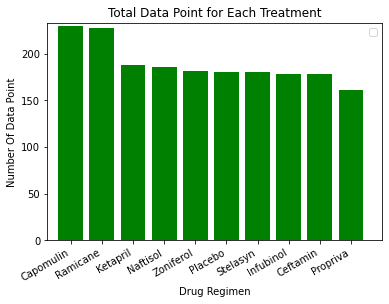

In [93]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(mice.index, mice.values, color ='#008000')
plt.title("Total Data Point for Each Treatment", fontsize = 12 )
plt.xlabel('Drug Regimen')
plt.xlim(-0.75, len(mice.index)-0)
plt.xticks(rotation = 30, ha = 'right')
plt.ylim(0, max(mice.values) + 3)
#plt.bar(x= mice.index, height =mice.values, width = 0.4)
plt.ylabel('Number Of Data Point')
plt.legend()
plt.show()

In [20]:
df_gender =pd.DataFrame({'Sex':['female','male']})
                        
df_gender



,Sex
0,female
1,male


In [21]:
font = {'family': 'serif',
        'color': 'red',
        'weight': 'normal',
        'size': 12
        
        }

In [22]:
import matplotlib as mpl
#mpl.rcParams['axes.title color']= 'red'

In [23]:
def new_func():
    gender = clean_mouse_df["Sex"].value_counts()
    gender_columns=['Total count']
    return gender

gender = new_func()

gender


Male      958
Female    935
Name: Sex, dtype: int64

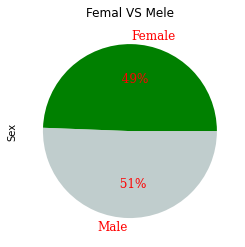

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_mouse_df["Sex"].value_counts()
gender.columns=['Total count']
plt.title("Femal VS Mele")
colors = ['g','#abbb']
gender_plot = gender_count.plot.pie( autopct='%4.f%%', textprops=font, colors = colors)
plt.ylabel("Sex")
#plt.axis("equal")
plt.show()



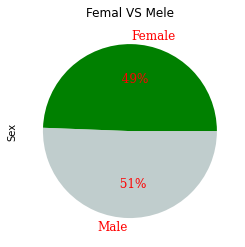

In [71]:
#Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
count = [gender_count["Female"],gender_count["Male"]]
plt.title("Femal VS Mele")
colors = ['g','#abbb']
plt.pie(count, labels = labels, autopct='%4.f%%', textprops=font, colors = colors)
plt.ylabel("Sex")
#plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = combine_df.groupby('Mouse ID')
last_timepoint = last_timepoint['Timepoint'].max()
last_timepoint_df =pd.DataFrame(last_timepoint )
last_timepoint_df





,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [30]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tomor_volume = pd.merge(last_timepoint_df, combine_df, on = ['Mouse ID', 'Timepoint'])
tomor_volume 

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [31]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list =['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)

treatments_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in treatment_list:
   # Locate the rows which contain mice on each drug and get the tumor volumes

    treatment = tomor_volume.loc[tomor_volume['Drug Regimen'] == drug,'Tumor Volume (mm3)']
     # add subset  
    treatments_vol.append(treatment) 

    # Determine outliers using upper and lower bounds
    
    quartiles = treatment.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

  
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier = treatment.loc[(treatment < lower_bound) | (treatment > upper_bound)]
    print(f" outlier for {drug} are: { outlier }")
    
    
   
    
  

    


 outlier for Capomulin are: Series([], Name: Tumor Volume (mm3), dtype: float64)
 outlier for Ramicane are: Series([], Name: Tumor Volume (mm3), dtype: float64)
 outlier for Infubinol are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
 outlier for Ceftamin are: Series([], Name: Tumor Volume (mm3), dtype: float64)


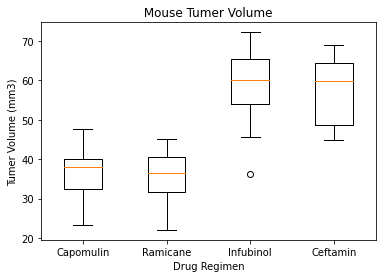

In [99]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(treatments_vol, labels = treatment_list)
plt.title(" Mouse Tumer Volume ")
plt.ylabel('Tumer Volume (mm3)')
plt.xlabel('Drug Regimen')


plt.show()

## Line and Scatter Plots

In [33]:

time_point_df =combine_df.loc[combine_df['Drug Regimen'] == 'Capomulin']
time_point_df 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [34]:
time_point_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


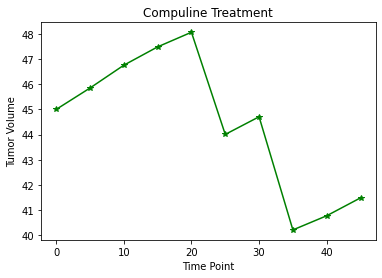

In [97]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin (l509)
time_point_df_mouse = time_point_df[time_point_df['Mouse ID'] == 'l509']

#time_point_df =combine_df.loc[combine_df['Drug Regimen'] == 'Capomulin']


#treatment_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
plt.plot(time_point_df_mouse['Timepoint'],time_point_df_mouse['Tumor Volume (mm3)'], color = '#008000',marker ='*')
plt.title('Compuline Treatment')
plt.ylabel('Tumor Volume')
plt.xlabel('Time Point')
plt.show()

#ime_point_df


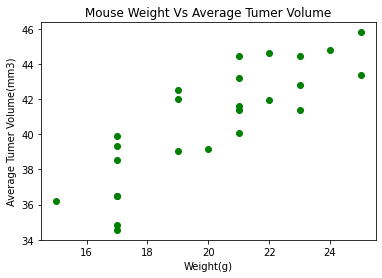

In [96]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_df =time_point_df.groupby(['Mouse ID']).mean()
plt.scatter(avg_tumor_df['Weight (g)'], avg_tumor_df['Tumor Volume (mm3)'], color = '#008000')
plt.title('Mouse Weight Vs Average Tumer Volume')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumer Volume(mm3)')
plt.show()
#avg_tumor_df

## Correlation and Regression

In [37]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


In [38]:
# Calculate the correlation coefficient and a linear regression model 
correlation = st.pearsonr(avg_tumor_df['Weight (g)'], avg_tumor_df['Tumor Volume (mm3)'])
correlation

(0.8419363424694717, 1.322572243471279e-07)

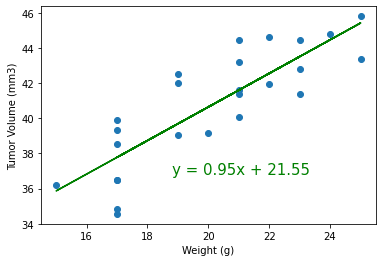

In [95]:
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = avg_tumor_df['Weight (g)']
y_values = avg_tumor_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"#008000")
plt.annotate(line_eq,(18.8,36.8),fontsize=15,color="#008000")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()